# SDE solvers

In [1]:
from SDETestProblems import prey_predator_model, van_der_pol_model, CSTR_1state_model, CSTR_3state_model, PFR_1state_model, PFR_3state_model
import numpy as np
import matplotlib.pyplot as plt
from Solvers import StdWeinerProcess, SDEsolverExplicitExplicit, SDEsolverImplicitExplicit

## Wiener process

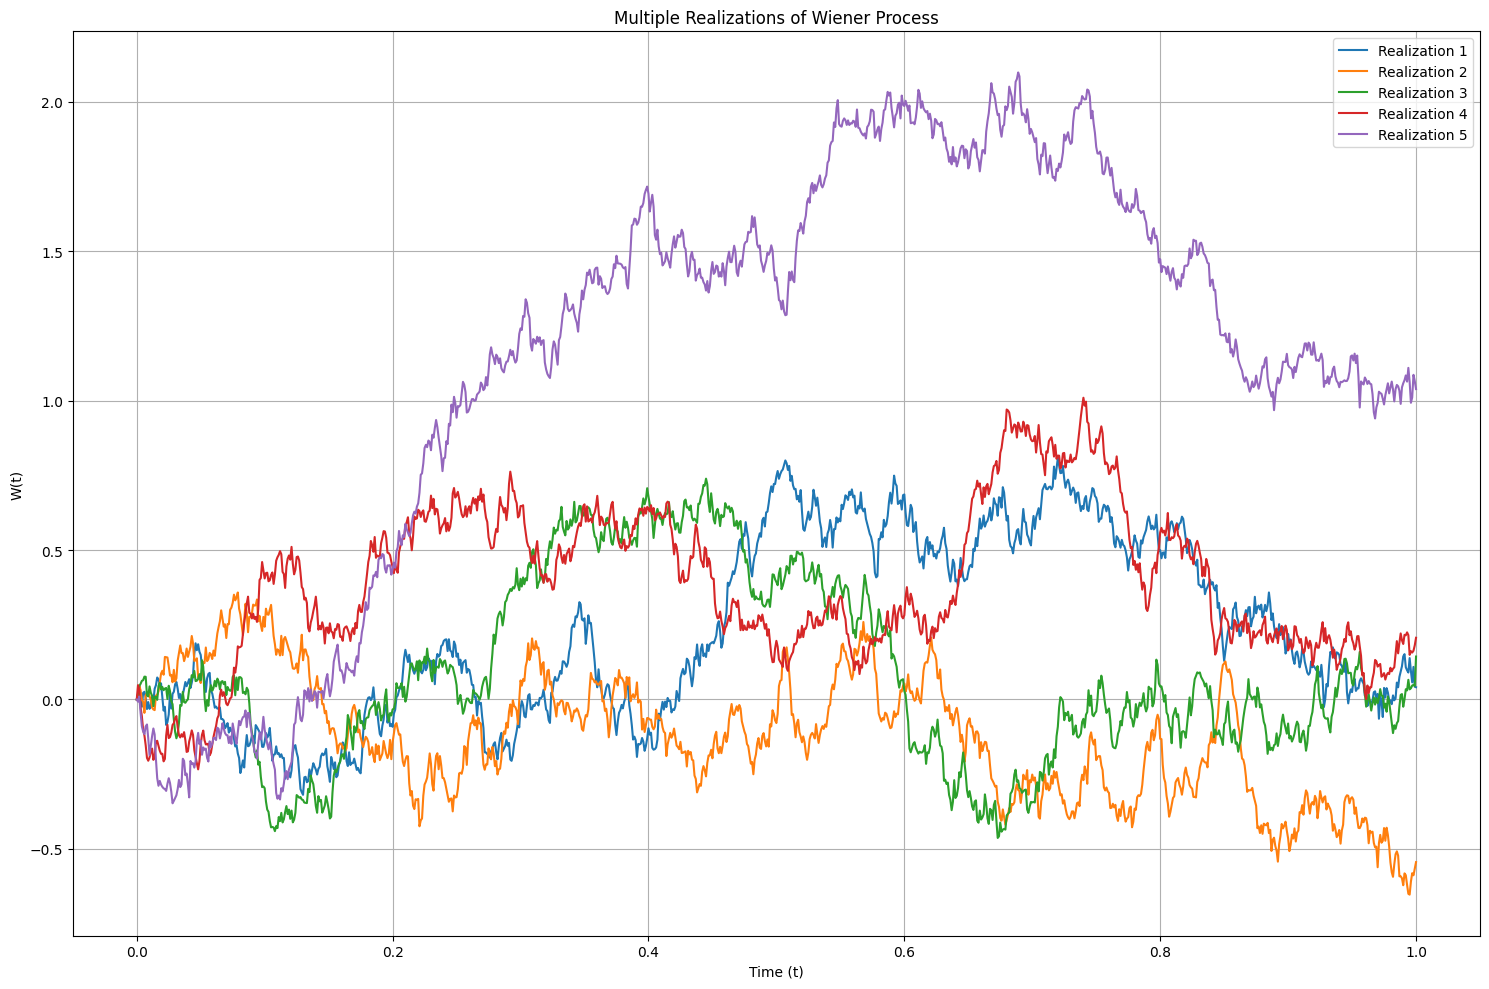

In [2]:
# Parameters
T = 1.0       # Total time
N = 1000      # Number of time steps
nW = 1        # Number of Wiener processes
Ns = 5        # Number of realizations (sample paths)
seed = 42     # For reproducibility

# Generate Wiener process
W, Tw, dW = StdWeinerProcess(T, N, nW, Ns, seed)

# Create figure with 3 subplots
plt.figure(figsize=(15, 10))

# Plot 1: Multiple realizations
for i in range(Ns):
    plt.plot(Tw, W[0,:,i], label=f'Realization {i+1}')
plt.title('Multiple Realizations of Wiener Process')
plt.xlabel('Time (t)')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Prey-predator

In [3]:
def prey_predator_model(alpha, beta, esdirk=False, SDE=False, SDE2 = False, sigma = 0.05):
    def f(t, z):
        x, y = z
        dxdt = alpha * (1-y)*x
        dydt = - beta * (1-x)*y
        if esdirk:
            return np.array([dxdt, dydt]), z
        else:
            return np.array([dxdt, dydt])
    
    def g(t, z):
        x, y = z
        return np.diag([0, sigma*y])
    
    def g2(t, z):
        x, y = z
        return np.diag([sigma*x, 0])
    
    def jacobian(t, z):
        x, y = z
        df_dx = alpha * (1-y)
        df_dy = - alpha * x
        dg_dx = beta * y
        dg_dy = -beta * (1 - x)
        if esdirk:
            return np.array([[df_dx, df_dy],
                           [dg_dx, dg_dy]]), np.eye(2)
        else:
            return np.array([[df_dx, df_dy],
                           [dg_dx, dg_dy]])
    
    if SDE:
        return f, g, jacobian
    elif SDE2:
        return f, g2, jacobian
    else:
        return f, jacobian

In [4]:
# Define time span and initial conditions
t_span = (0, 20)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.5  # Predation rate

tf = t_span[1] - t_span[0]
nw = 2
N = 1000
Ns = 10
seed = 100

f, g, J = prey_predator_model(a, b, SDE = True, sigma = 0.50)
f2, g2, J2 = prey_predator_model(a, b, SDE2 = True, sigma = 0.50)

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

X = np.zeros((len(x0), N+1, Ns))
X2 = np.zeros((len(x0), N+1, Ns))

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    X2[:, :, i] = SDEsolverExplicitExplicit(f2, g2, T, x0, W[:, :, i])

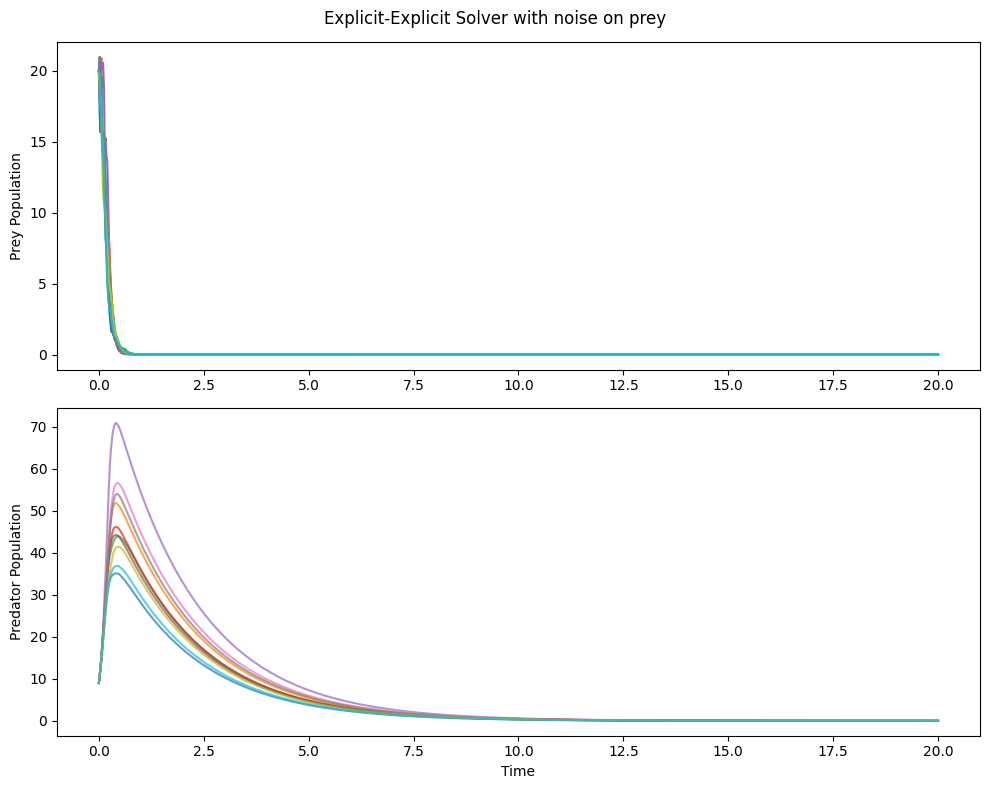

In [5]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
for i in range(Ns):
    ax1.plot(T, X2[0, :, i], label=f'Prey {i+1}')
    ax2.plot(T, X2[1, :, i], label=f'Predator {i+1}', alpha=0.7)

ax1.set_ylabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_xlabel('Time')
plt.suptitle('Explicit-Explicit Solver with noise on prey')
#ax1.legend()
#ax2.legend()
plt.tight_layout()
plt.show()

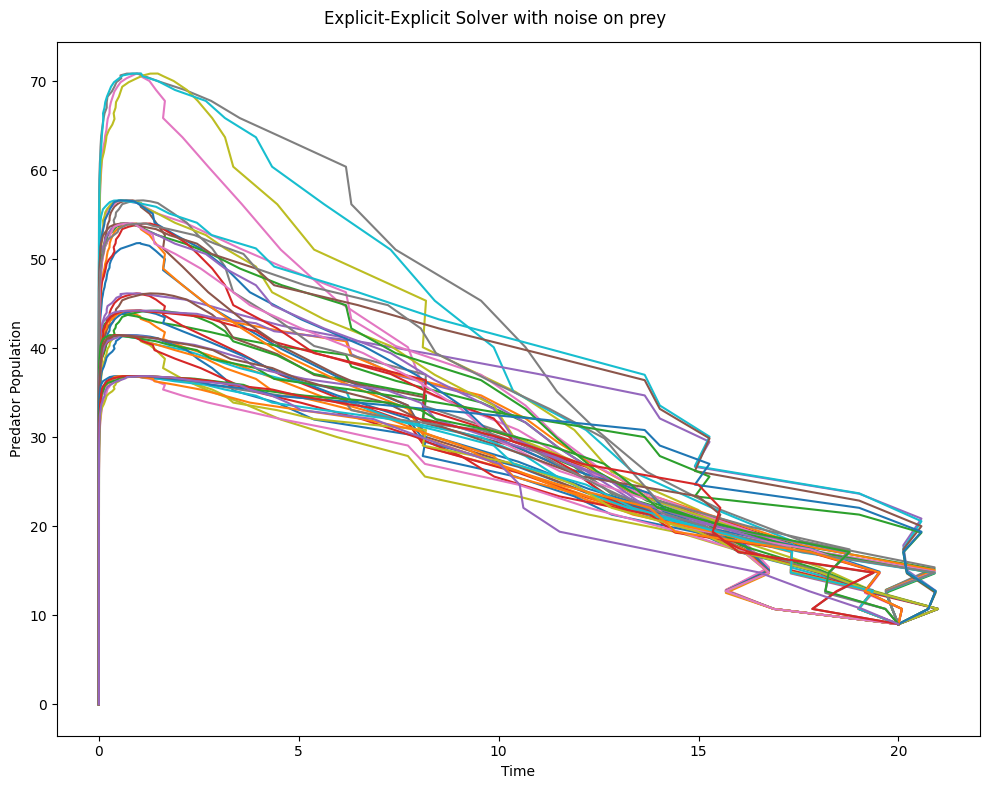

In [6]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(Ns):
    ax.plot(X2[0, :, :i], X2[1, :, i], label=f'Prey {i+1}')

ax.set_ylabel('Prey Population')
ax.set_ylabel('Predator Population')
ax.set_xlabel('Time')
plt.suptitle('Explicit-Explicit Solver with noise on prey')
#ax1.legend()
#ax2.legend()
plt.tight_layout()
plt.show()

In [7]:
X_mean = np.mean(X, axis=2)
#Plot means


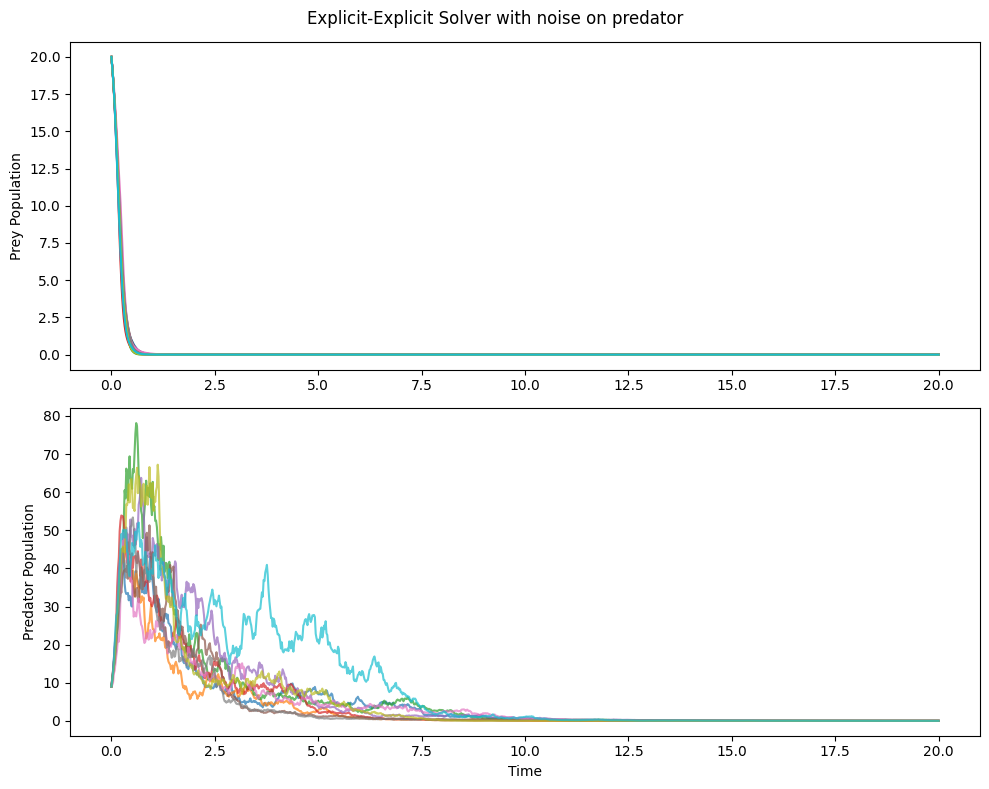

In [8]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
for i in range(Ns):
    ax1.plot(T, X[0, :, i], label=f'Prey {i+1}')
    ax2.plot(T, X[1, :, i], label=f'Predator {i+1}', alpha=0.7)

ax1.set_ylabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_xlabel('Time')
plt.suptitle('Explicit-Explicit Solver with noise on predator')
#ax1.legend()
#ax2.legend()
plt.tight_layout()
plt.show()

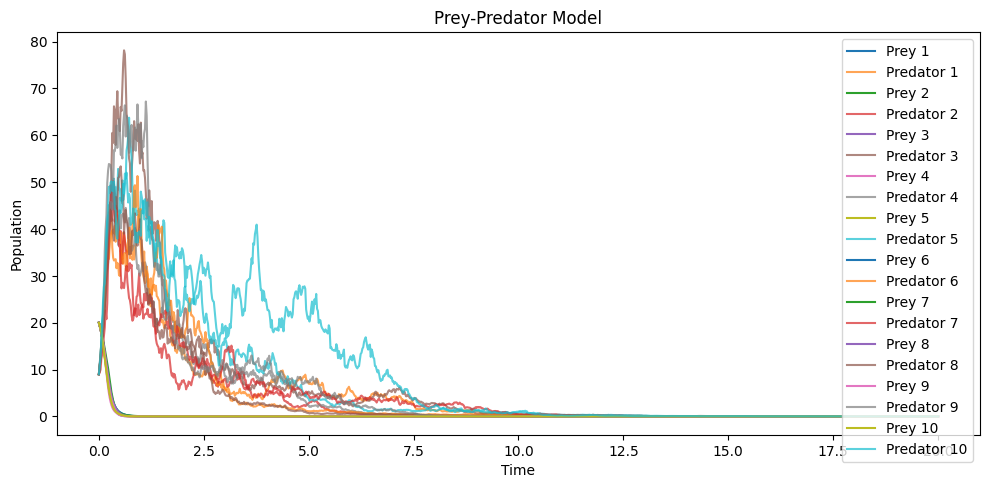

In [9]:
# Plot the results in time series in one plot   
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(Ns):
    ax.plot(T, X[0, :, i], label=f'Prey {i+1}')
    ax.plot(T, X[1, :, i], label=f'Predator {i+1}', alpha=0.7)
ax.set_title('Prey-Predator Model')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()
plt.tight_layout()
plt.show()

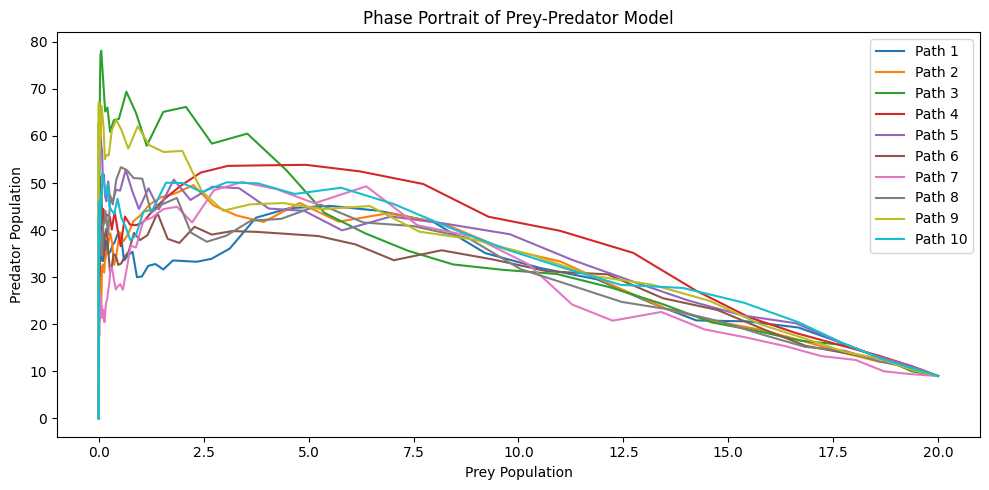

In [10]:
#Plot the phase portrait
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(Ns):
    ax.plot(X[0, :, i], X[1, :, i], label=f'Path {i+1}')
ax.set_title('Phase Portrait of Prey-Predator Model')
ax.set_xlabel('Prey Population')
ax.set_ylabel('Predator Population')
ax.legend()
plt.tight_layout()
plt.show()

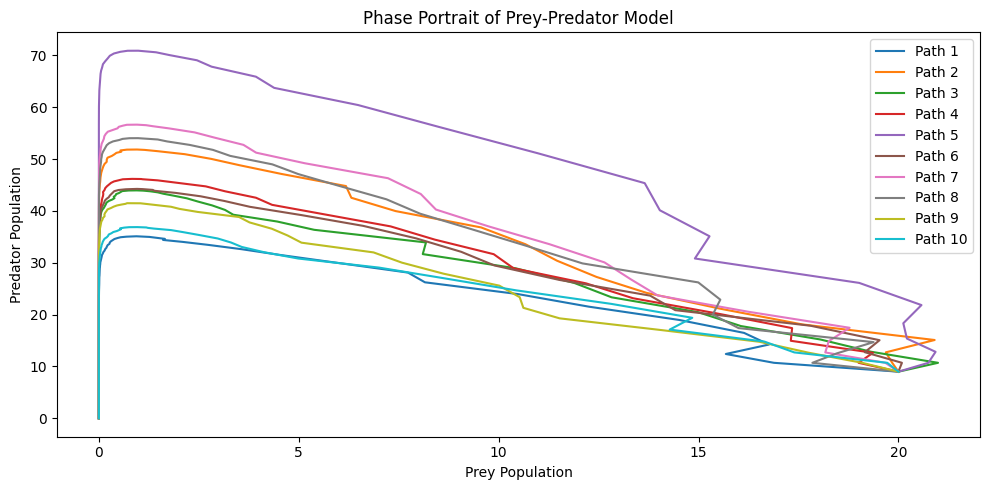

In [11]:
#Plot the phase portrait
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(Ns):
    ax.plot(X2[0, :, i], X2[1, :, i], label=f'Path {i+1}')
ax.set_title('Phase Portrait of Prey-Predator Model')
ax.set_xlabel('Prey Population')
ax.set_ylabel('Predator Population')
ax.legend()
plt.tight_layout()
plt.show()

## Van der Pol

In [12]:
x0 = np.array([0.5, 0.5])
mu = 3
tf = 20
nw = 2
N = 1000
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))
X2 = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))
X2i = np.zeros((len(x0), N+1, Ns))


f, g, Jac = van_der_pol_model(mu, SDE = True, sigma = 0.05)
f2, g2, Jac2 = van_der_pol_model(mu, SDE2 = True, sigma = 0.05)

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    X2[:, :, i] = SDEsolverExplicitExplicit(f2, g2, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])
    X2i[:, :, i] = SDEsolverImplicitExplicit(f2, Jac2, g2, T, x0, W[:, :, i])



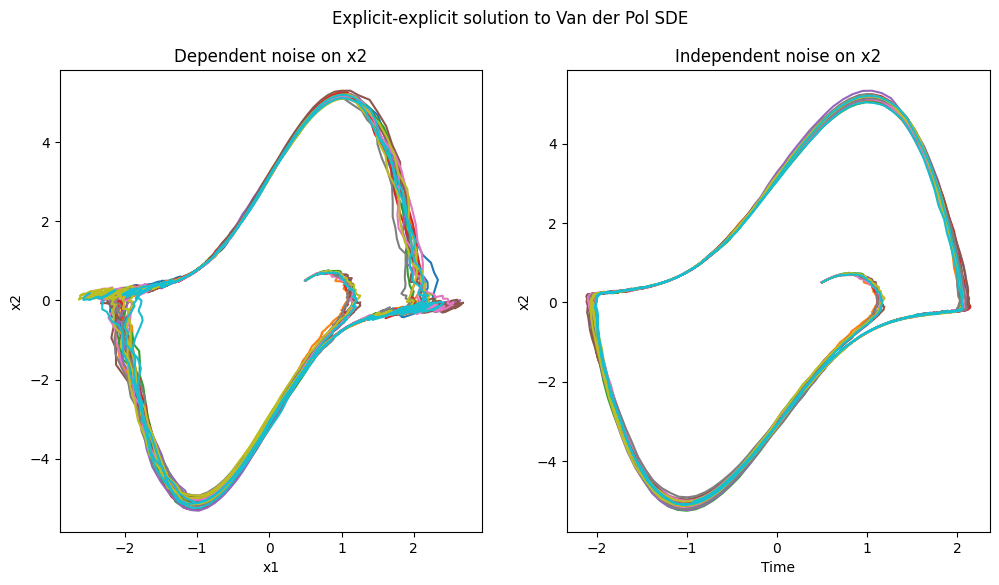

In [13]:

#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[0, :, i], X[1,:,i])
    ax2.plot(X2[0, :, i], X2[1,:,i])
ax1.set_title('Dependent noise on x2')
ax2.set_title('Independent noise on x2')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Explicit-explicit solution to Van der Pol SDE')
ax2.set_xlabel('Time')
plt.show()

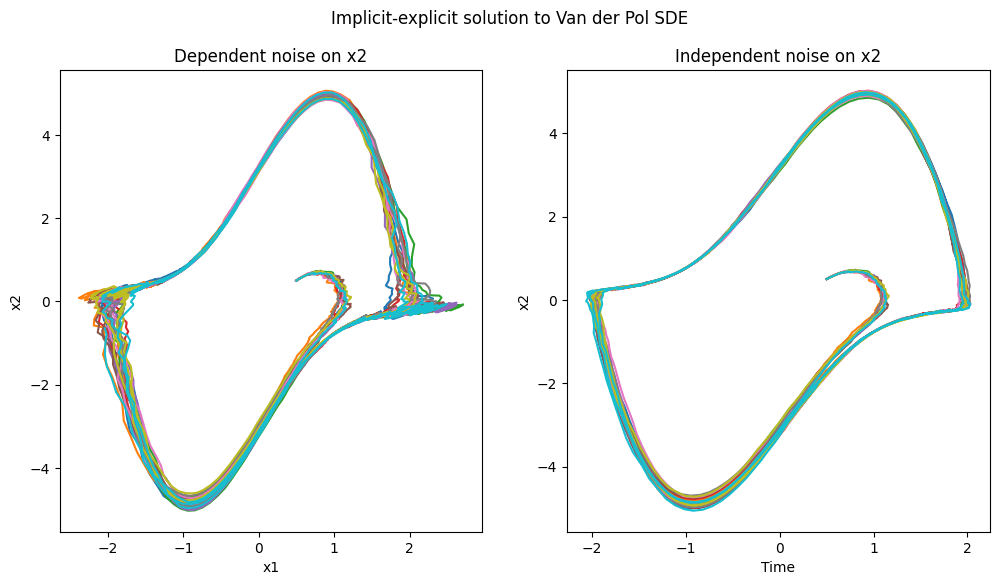

In [14]:

#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(Xi[0, :, i], Xi[1,:,i])
    ax2.plot(X2i[0, :, i], X2i[1,:,i])
ax1.set_title('Dependent noise on x2')
ax2.set_title('Independent noise on x2')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Implicit-explicit solution to Van der Pol SDE')
ax2.set_xlabel('Time')
plt.show()

In [15]:
x0 = np.array([0.5, 0.5])
mu = 3
tf = 20
nw = 2
N = 1000
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))
X2 = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))
X2i = np.zeros((len(x0), N+1, Ns))


f, g, Jac = van_der_pol_model(mu, SDE = True, sigma = 0.1)
f2, g2, Jac2 = van_der_pol_model(mu, SDE2 = True, sigma = 0.1)

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])



/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:48: RuntimeWarning: overflow encountered in scalar multiply
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:48: RuntimeWarning: overflow encountered in scalar power
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:285: RuntimeWarning: invalid value encountered in add
  X[:, i+1] = X[:, i] + f(t[i], X[:, i]) * dt + g(t[i], X[:, i]) @ dW
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:56: RuntimeWarning: overflow encountered in scalar power
  return np.array([0, sigma * (1.0 + x**2)])


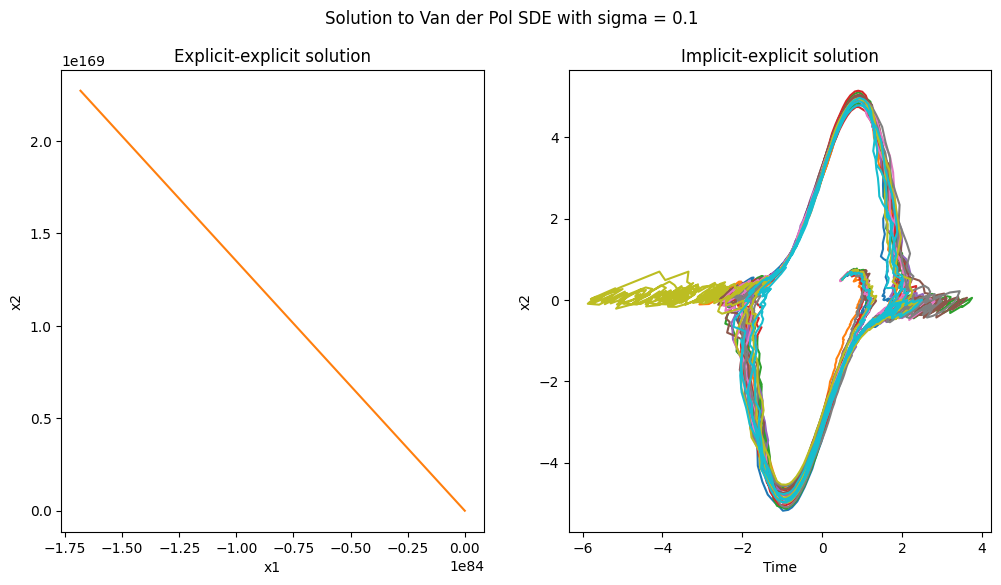

In [16]:

#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[0, :, i], X[1,:,i])
    ax2.plot(Xi[0, :, i], Xi[1,:,i])
ax1.set_title('Explicit-explicit solution')
ax2.set_title('Implicit-explicit solution')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Solution to Van der Pol SDE with sigma = 0.1')
ax2.set_xlabel('Time')
plt.show()

## CSTR 3 state

In [19]:
# Parameters for CSTR model
params = [0.5, 0.3, 4.5, 10.0, 300.0]  # [F, V, CAin, CBin, Tin]
t_span = (0, 10)
x0 = np.array([1.0, 0.5, 300.])  # Initial conditions [CA, CB, T]


tf = t_span[1] - t_span[0]
nw = 3  # MUST match number of state variables (3 for CSTR)
N = 1000
Ns = 10
seed = 100

# Generate Wiener process with correct dimension
W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

# Get SDE model functions
f, g, Jac = CSTR_3state_model(params, SDE=True)

# Initialize solution array
X = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))

# Solve SDE for each trajectory
for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:101: RuntimeWarning: overflow encountered in scalar multiply
  r = k(T) * CA * CB
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:102: RuntimeWarning: invalid value encountered in scalar subtract
  dCA_dt = (F/V) * (CAin-CA) - r
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:103: RuntimeWarning: invalid value encountered in scalar subtract
  dCB_dt = (F/V) * (CBin - CB) - 2*r
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:104: RuntimeWarning: invalid value encountered in scalar add
  dT_dt = (F/V) * (Tin - T) + beta * r


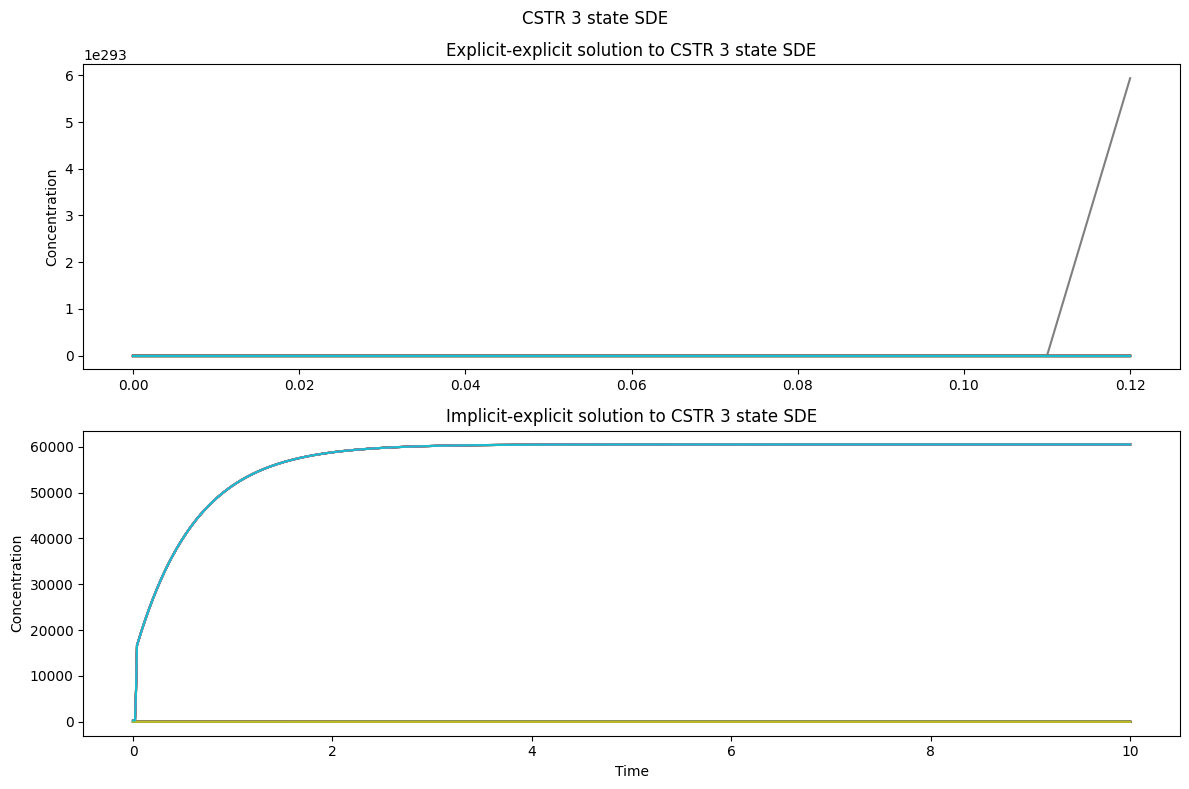

In [21]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
for i in range(Ns):
    ax1.plot(T, X[0,:,i])
    ax2.plot(T, Xi[0,:,i])
    ax1.plot(T, X[1,:,i])
    ax2.plot(T, Xi[1,:,i])
    ax1.plot(T, X[2,:,i])
    ax2.plot(T, Xi[2,:,i])
ax1.set_title('Explicit-explicit solution to CSTR 3 state SDE')
ax2.set_title('Implicit-explicit solution to CSTR 3 state SDE')
ax1.set_ylabel('Concentration')
ax2.set_ylabel('Concentration')
ax2.set_xlabel('Time')
plt.suptitle('CSTR 3 state SDE')
plt.tight_layout()
plt.show()



## CSTR 1 state

In [22]:
# Parameters for CSTR model
params = [0.5, 0.3, 0.1, 1.0, 300.0]  # [F, V, CAin, CBin, Tin]
t_span = (0, 20)
x0 = np.array([300.0])  # Initial conditions [T]

# Solver parameters
tf = t_span[1] - t_span[0]
nw = 1  # MUST match number of state variables
N = 1000
Ns = 10
seed = 100

# Generate Wiener process with correct dimension
W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

# Get SDE model functions
f, g, Jac = CSTR_1state_model(params, SDE=True)

# Initialize solution array
X = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))

# Solve SDE for each trajectory
for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:146: RuntimeWarning: overflow encountered in multiply
  r = k0 * np.exp(-Ea_R / T) * CA * CB
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:150: RuntimeWarning: invalid value encountered in add
  return F / V * (Tin - T) + beta * r


KeyboardInterrupt: 

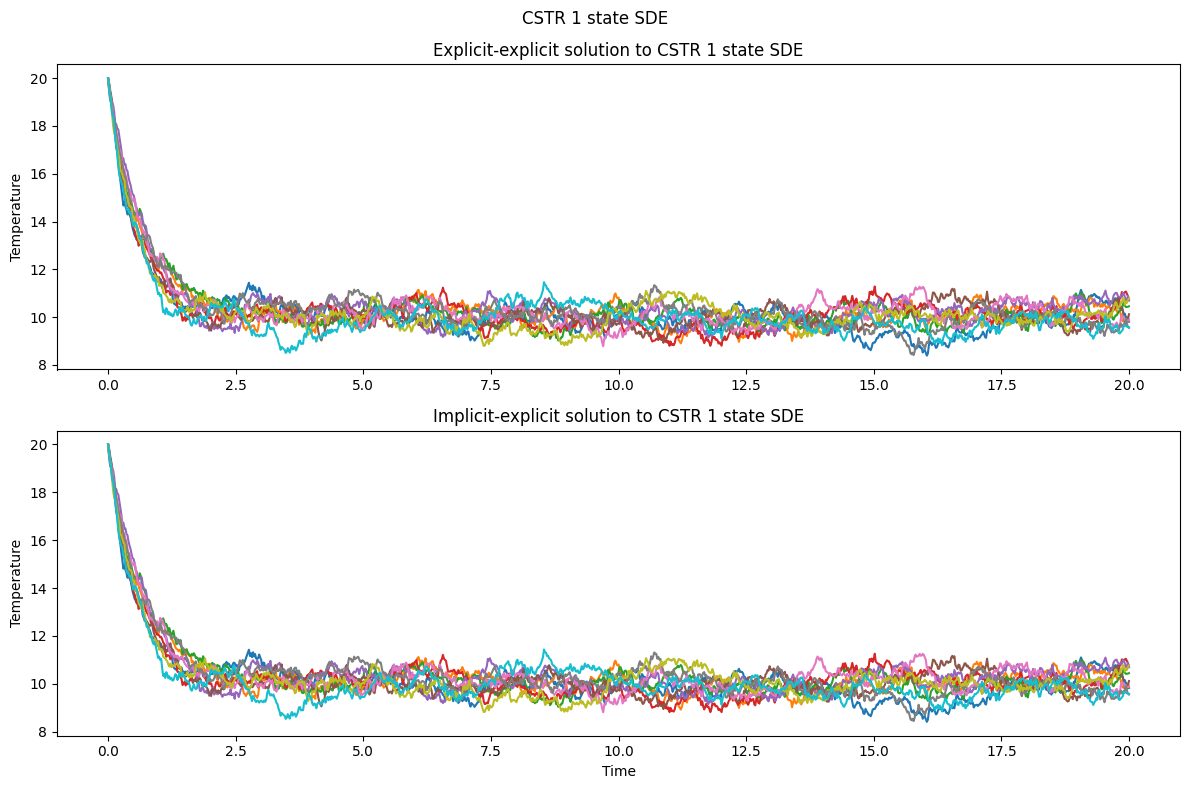

In [ ]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
for i in range(Ns):
    ax1.plot(T, X[0,:,i], label=f'Trajectory {i+1}')
    ax2.plot(T, Xi[0,:,i], label=f'Trajectory {i+1}')
ax1.set_title('Explicit-explicit solution to CSTR 1 state SDE')
ax2.set_title('Implicit-explicit solution to CSTR 1 state SDE')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Time')
plt.suptitle('CSTR 1 state SDE')
plt.tight_layout()
plt.show()

## PFR 1 state

In [10]:
def PFR_1state_model(params, esdirk=False, sigma_T = 0.1):
    """
    Creates PFR model functions with standard ODE interface (t, x) only for 1-state (T) system.
    
    Parameters:
    -----------
    params : dict
        Dictionary containing all model parameters:
            - dz : float     (spatial step)
            - v : float      (velocity)
            - D : float      (diffusivity DT)
            - beta : float   (heat of reaction)
            - k : function   (reaction rate constant)
            - u : list       (inlet conditions [CAin, CBin, Tin])
            - Ea_R : float   (Activation energy divided by gas constant)
    
    esdirk : bool
        Flag for ESDIRK-specific returns
    
    Returns:
    --------
    f, jacobian : functions
        ODE functions compatible with standard solvers
    """
    # Unpack parameters
    dz = params["dz"]
    v = params["v"]
    DT = params["D"]
    beta = params["beta"]
    k = params["k"]
    CAin, CBin, Tin = params["u"]
    Ea_R = params["Ea_R"]
    
    def f(t, x):
        """ODE function for 1-state PFR system"""
        n = len(x)
        dT_dt = np.zeros(n)
        
        # Calculate CA and CB from temperature (assuming equilibrium)
        CA = CAin + (1 / beta) * (Tin - x)
        CB = CBin + (2 / beta) * (Tin - x)
        
        # Reaction term
        r = k(x) * CA * CB
        
        # Convection term
        NconvT = np.zeros(n+1)
        NconvT[0] = v * Tin         # Inlet Boundary (Dirichlet)
        NconvT[1:n+1] = v * x[0:n]
        
        # Diffusion term
        JT = np.zeros(n+1)
        JT[1:n] = (-DT / dz) * (x[1:n] - x[0:n-1])
        JT[0] = 0                   # Inlet Boundary (Dirichlet)
        JT[-1] = 0                  # Outlet Boundary (Neumann)
        
        # Total flux and reaction term
        NT = NconvT + JT
        rT = beta * r
        
        # Differential Equation for T
        dT_dt = (NT[1:n+1] - NT[0:n]) / (-dz) + rT
        
        if esdirk:
            return dT_dt, x
        return dT_dt
    
    def g(t, T):
        return np.diag([sigma_T * T])

    def jacobian(t, x):
        """Jacobian function for 1-state PFR system"""
        n = len(x)
        
        # Calculate CA and CB from temperature
        CA = CAin + (1 / beta) * (Tin - x)
        CB = CBin + (2 / beta) * (Tin - x)
        
        # Initialize Jacobian matrix
        J = np.zeros((n, n))
        
        # Main diagonal terms (including reaction derivatives)
        main_diag = (-v/dz - DT/dz**2) + beta * k(x) * (
            (Ea_R/x**2)*CA*CB - (1/beta)*CB - (2/beta)*CA
        )
        
        # Lower diagonal (diffusion terms)
        lower_diag = DT/dz**2
        
        # Upper diagonal (would be convection terms, but upwind scheme makes them zero)
        
        # Fill the Jacobian matrix
        for i in range(n):
            J[i, i] = main_diag[i]
            if i > 0:
                J[i, i-1] = lower_diag
        
        if esdirk:
            return J, np.eye(n)
        return J
    
    return f, g, jacobian

In [17]:
# Define parameters
x0 = 300*np.ones(50)
params = {
    "dz": 0.1,
    "v": 1.0,
    "D": 0.2,
    "beta": 0.1,
    "k": lambda T: 1.0 * np.exp(-5000/T),
    "u": [10.0, 5.0, 300.0],
    "Ea_R": 5000.0,
    "sigma_T": 0.2,
    "sigma_r": 0.1
}

# Solver parameters
t_span = (0, 20)
tf = t_span[1] - t_span[0]
nw = 1  # MUST match number of state variables
N = 1000
Ns = 5
seed = 100

# Create model
# Generate Wiener process with correct dimension
W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

# Get SDE model functions
f, g, Jac = PFR_1state_model(params, sigma_T = 0.01)

# Initialize solution array
X = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))

# Solve SDE for each trajectory
for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])

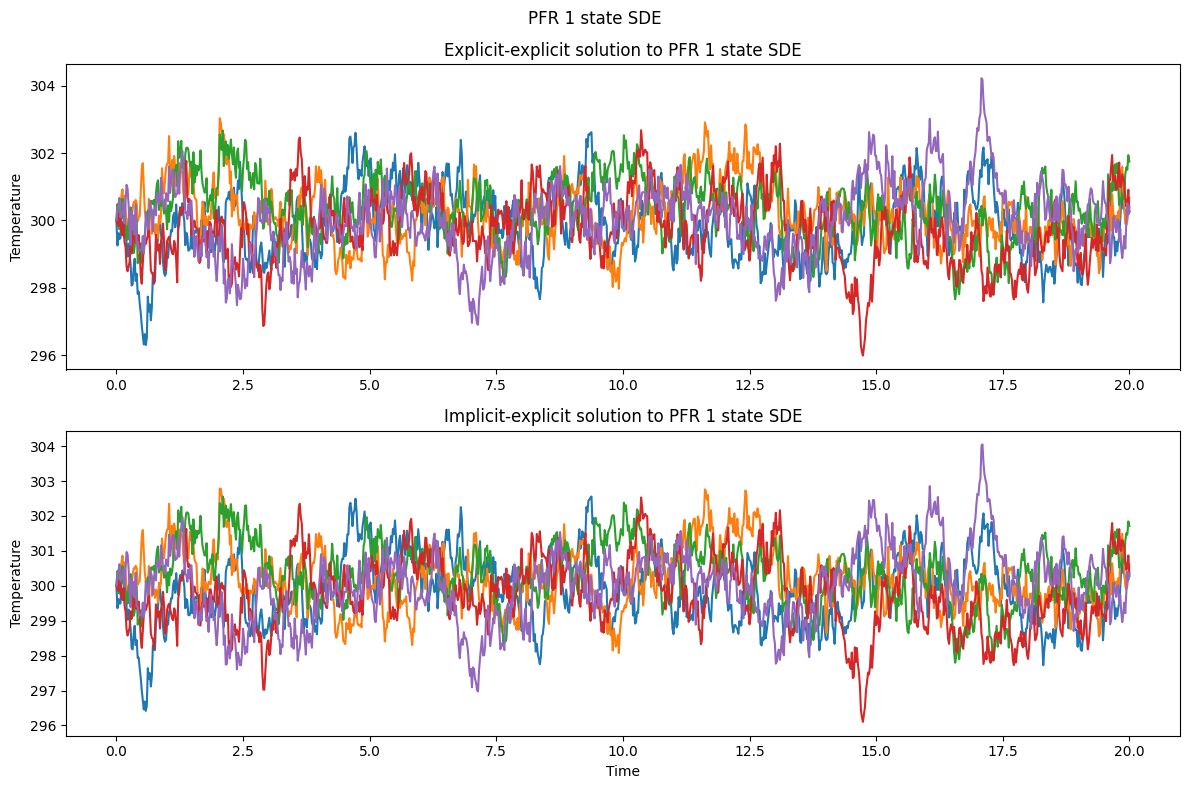

In [18]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
for i in range(Ns):
    ax1.plot(T, X[0,:,i], label=f'Trajectory {i+1}')
    ax2.plot(T, Xi[0,:,i], label=f'Trajectory {i+1}')
ax1.set_title('Explicit-explicit solution to PFR 1 state SDE')
ax2.set_title('Implicit-explicit solution to PFR 1 state SDE')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Time')
plt.suptitle('PFR 1 state SDE')
plt.tight_layout()
plt.show()

## PFR 3 state

In [41]:
# Define parameters
x0 = np.array([1.0, 1.0, 300.0])
params = {
    "dz": 0.1,
    "v": 1.0,
    "D": [0.1, 0.1, 0.2],
    "beta": 0.1,
    "k": lambda T: 1.0 * np.exp(-5000/T),
    "u": x0,  # [CAin, CBin, Tin]
    "Ea_R": 5000.0
}

# Solver parameters
t_span = (0, 20)
tf = t_span[1] - t_span[0]
nw = 3  # MUST match number of state variables (3 for CSTR)
N = 1000
Ns = 10
seed = 100

# Create model
# Generate Wiener process with correct dimension
W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

# Get SDE model functions
f, g, Jac = PFR_3state_model(params, SDE=True)

# Initialize solution array
X = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))

# Solve SDE for each trajectory
for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])

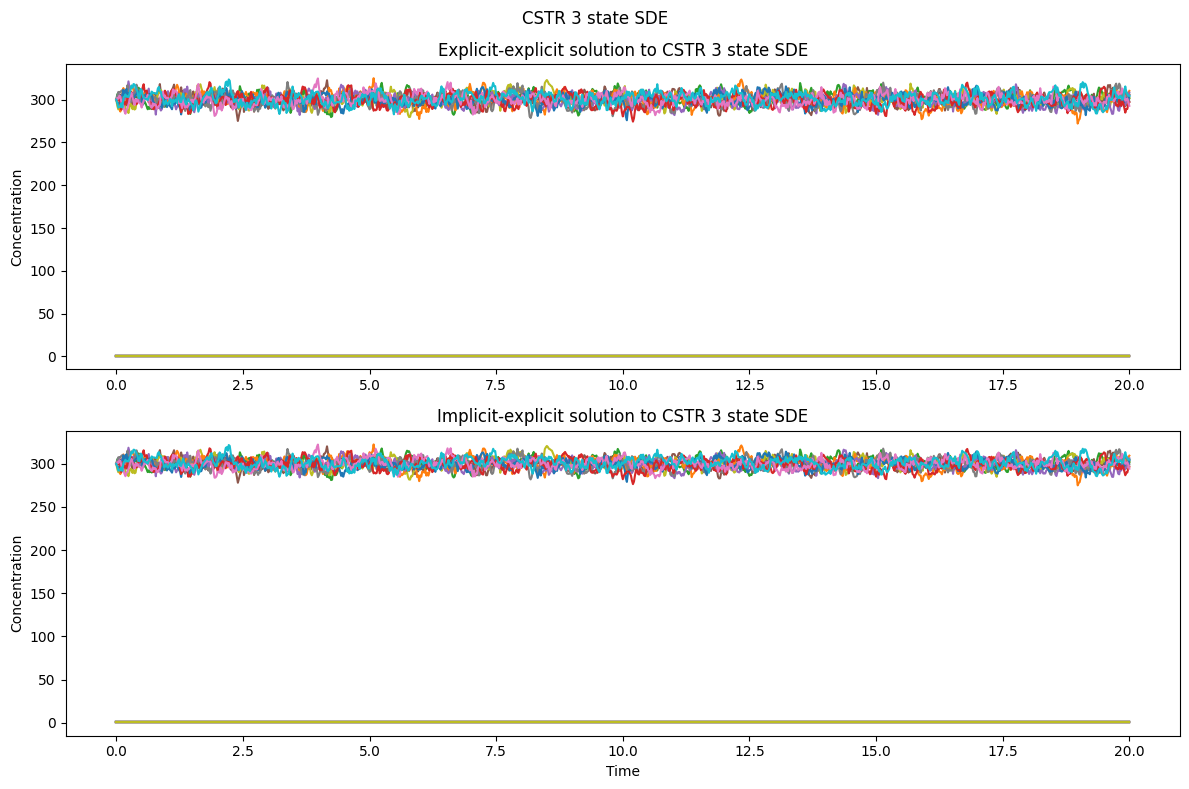

In [42]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
for i in range(Ns):
    ax1.plot(T, X[0,:,i])
    ax2.plot(T, Xi[0,:,i])
    ax1.plot(T, X[1,:,i])
    ax2.plot(T, Xi[1,:,i])
    ax1.plot(T, X[2,:,i])
    ax2.plot(T, Xi[2,:,i])
ax1.set_title('Explicit-explicit solution to CSTR 3 state SDE')
ax2.set_title('Implicit-explicit solution to CSTR 3 state SDE')
ax1.set_ylabel('Concentration')
ax2.set_ylabel('Concentration')
ax2.set_xlabel('Time')
plt.suptitle('CSTR 3 state SDE')
plt.tight_layout()
plt.show()


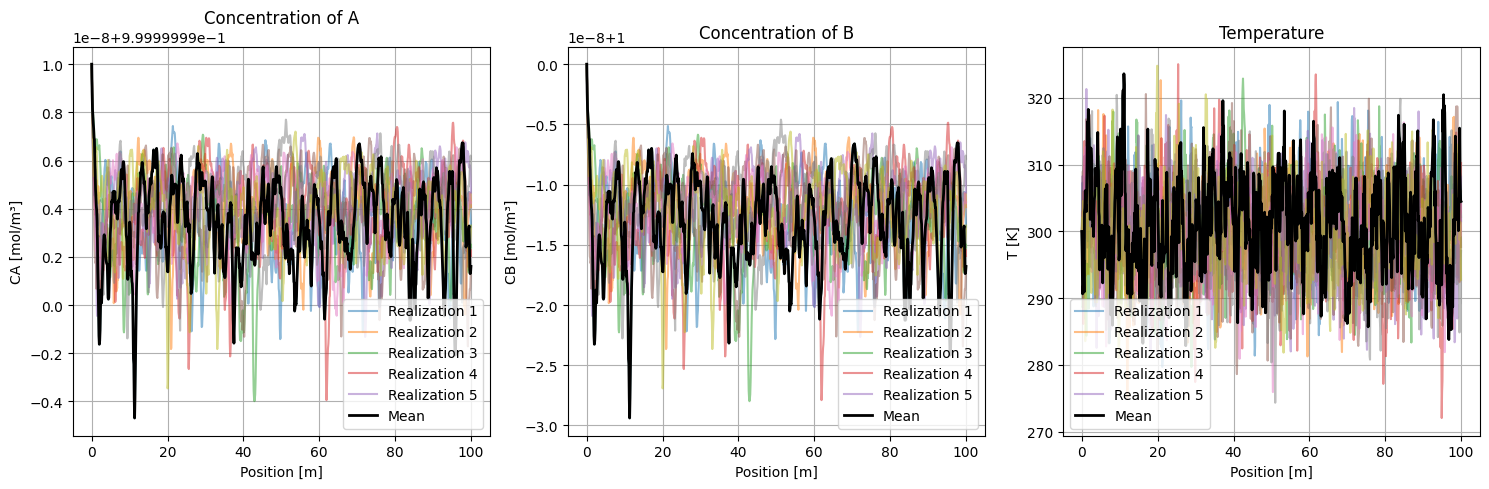

ValueError: x and y must have same first dimension, but have shapes (1001,) and (1,)

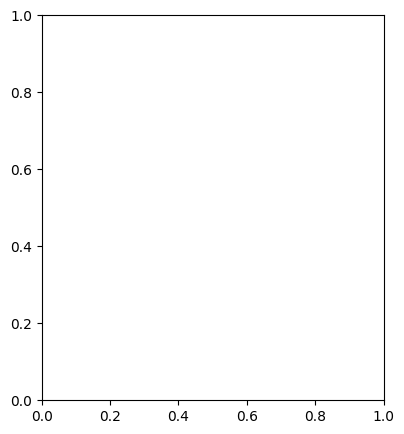

In [ ]:
# Plot results at final time
n = N
z = np.linspace(0, params['dz'] * n, n + 1)
CA_final = X[0, :, -1]
CB_final = X[1, :, -1]
T_final = X[2, :, -1]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for i in range(Ns):
    plt.plot(z[:X.shape[1]], X[0, :, i], alpha=0.5, label=f'Realization {i+1}' if i < 5 else None)
plt.plot(z, CA_final, 'k-', linewidth=2, label='Mean')
plt.title('Concentration of A')
plt.xlabel('Position [m]')
plt.ylabel('CA [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
for i in range(Ns):
    plt.plot(z[:X.shape[1]], X[1, :, i], alpha=0.5, label=f'Realization {i+1}' if i < 5 else None)
plt.plot(z, CB_final, 'k-', linewidth=2, label='Mean')
plt.title('Concentration of B')
plt.xlabel('Position [m]')
plt.ylabel('CB [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
for i in range(Ns):
    plt.plot(z[:X.shape[1]], X[2, :, i], alpha=0.5, label=f'Realization {i+1}' if i < 5 else None)
plt.plot(z, T_final, 'k-', linewidth=2, label='Mean')
plt.title('Temperature')
plt.xlabel('Position [m]')
plt.ylabel('T [K]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Plot time evolution at selected positions
selected_positions = [0, n//4, n//2, 3*n//4, n-1]
position_labels = [f'z={z[pos]:.1f}m' for pos in selected_positions]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for pos in selected_positions:
    for i in range(Ns):
        plt.plot(T, X[0, pos, i], alpha=0.5, label=f'Realization {i+1}' if i == 0 else None)
    plt.plot(T, np.mean(X[0, pos, :], axis=0), 'k-', linewidth=2, label='Mean')
plt.title('CA vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('CA [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
for pos in selected_positions:
    for i in range(Ns):
        plt.plot(T, X[1, pos, i], alpha=0.5, label=f'Realization {i+1}' if i == 0 else None)
    plt.plot(T, np.mean(X[1, pos, :], axis=0), 'k-', linewidth=2, label='Mean')
plt.title('CB vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('CB [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
for pos in selected_positions:
    for i in range(Ns):
        plt.plot(T, X[2, pos, i], alpha=0.5, label=f'Realization {i+1}' if i == 0 else None)
    plt.plot(T, np.mean(X[2, pos, :], axis=0), 'k-', linewidth=2, label='Mean')
plt.title('T vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('T [K]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()